dataset :  https://www.kaggle.com/datasets/abdallahwagih/mall-customers-segmentation

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df = dataset.drop('CustomerID', axis=1)

In [6]:
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

In [7]:
features = df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
features.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [9]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [10]:
features_st = minmax.fit_transform(features)
features_st = pd.DataFrame(features_st, columns=features.columns)

In [11]:
features_st.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,0.019231,0.000000,0.387755
1,0.0,0.057692,0.000000,0.816327
2,1.0,0.038462,0.008197,0.051020
3,1.0,0.096154,0.008197,0.775510
4,1.0,0.250000,0.016393,0.397959


In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ELBOW POINT

In [14]:
inertia = [] 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features_st)
    inertia.append(kmeans.inertia_)

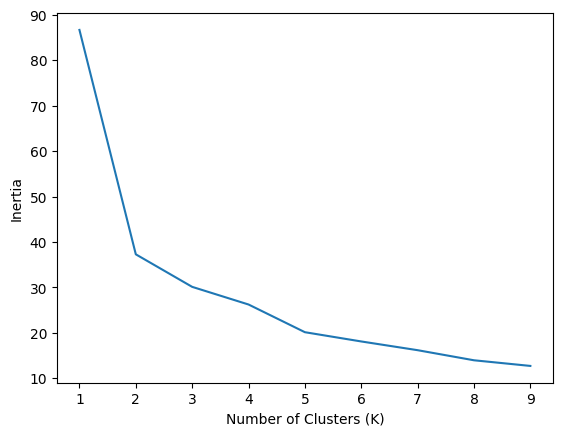

In [17]:
plt.plot(range(1, 10), inertia)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


Silhouette Score

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
silhouette_scores = []
for k in range(2, 10):  
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(features_st)
    score = silhouette_score(features_st, labels)
    silhouette_scores.append(score)

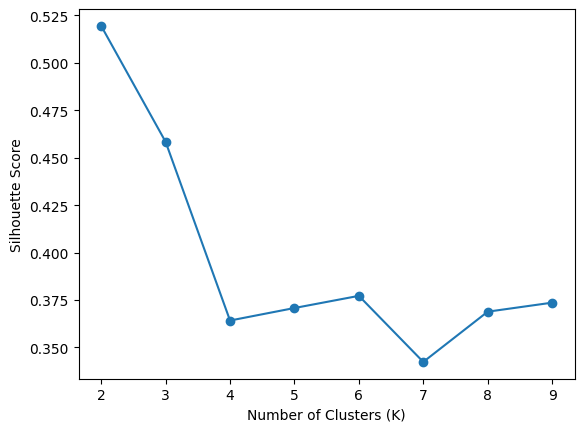

In [22]:

plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


K=2 → بالاترین امتیاز → خوشه‌بندی ساده ولی خیلی واضح

K=6 → امتیاز نسبتاً خوب → شاید تفکیک دقیق‌تر با جزئیات بیشتر

KMEANS

In [23]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(features_st)

In [24]:
df['Cluster'] = clusters

In [25]:
print(df.head())

   Genre  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0      0   19                  15                      39        1
1      0   21                  15                      81        1
2      1   20                  16                       6        0
3      1   23                  16                      77        0
4      1   31                  17                      40        0


In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_st)

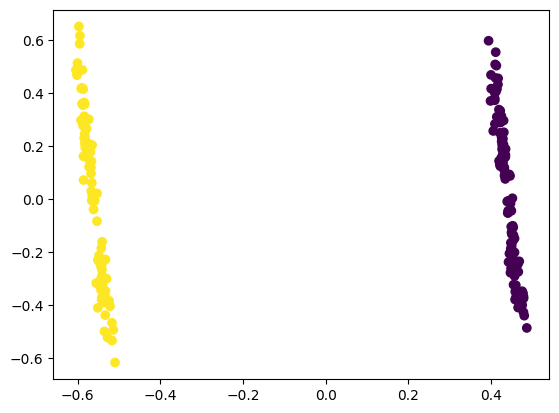

In [29]:
plt.scatter(features_pca[:,0], features_pca[:,1], c=df['Cluster'], cmap='viridis')
plt.show()

In [30]:
df.groupby('Cluster').mean()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,1.0,38.098214,59.250000,51.526786
1,0.0,39.806818,62.227273,48.511364


DB SCAN

In [31]:
from sklearn.cluster import DBSCAN

In [32]:
features_st.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,0.019231,0.000000,0.387755
1,0.0,0.057692,0.000000,0.816327
2,1.0,0.038462,0.008197,0.051020
3,1.0,0.096154,0.008197,0.775510
4,1.0,0.250000,0.016393,0.397959


In [33]:
dbscan = DBSCAN(eps=0.25, min_samples=4)
clusters_db = dbscan.fit_predict(features_st)
df['DBSCAN_Cluster'] = clusters_db

In [35]:
df['DBSCAN_Cluster'].value_counts()

DBSCAN_Cluster
 1    111
 0     79
-1      6
 2      4
Name: count, dtype: int64

In [36]:
df[df['DBSCAN_Cluster'] == -1]

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,DBSCAN_Cluster
0,0,19,15,39,1,-1
2,1,20,16,6,0,-1
14,0,37,20,13,1,-1
20,0,35,24,35,1,-1
198,0,32,137,18,1,-1
199,0,30,137,83,1,-1


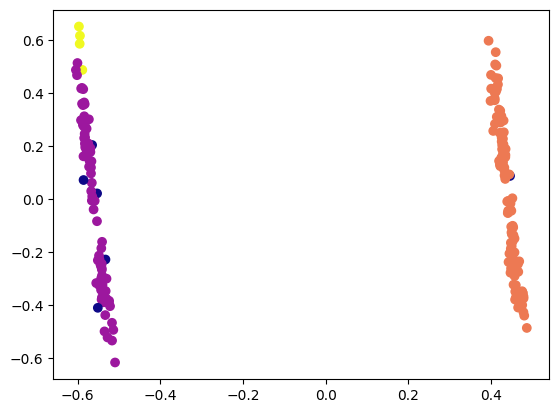

In [37]:
plt.scatter(features_pca[:,0], features_pca[:,1], c=df['DBSCAN_Cluster'], cmap='plasma')
plt.show()

In [38]:
df.groupby('DBSCAN_Cluster').mean()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
DBSCAN_Cluster,,,,,
-1,0.166667,28.833333,58.166667,32.333333,0.833333
0,0.000000,39.316456,63.822785,51.341772,1.000000
1,1.000000,38.261261,59.639640,51.936937,0.000000
2,0.000000,61.000000,25.250000,6.250000,1.000000
